# EDA -  HAM10000 - Metadata

## 1 Importing Libraries

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## 2 Importing Data

In [155]:
#import table from tab file
dataframe = pd.read_csv('../data/HAM10000_metadata', delimiter=',')
# load processed metadata
processed_dataframe = pd.read_csv('../data/processed/Metadata_processed.csv')

## 3 Data Exploration

### Context of raw features and their values

Ham10000_metadata consists of 8 features.
1. **lesion_id** - unique id per lesion
2. **image_id** - unique id per image taken of lesion
3. **dx** contains diagnosis with the following values
* "bkl" - benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)
* "nv" - melanocytic nevi (normal moles)
* "df" - dermatofibroma (small scar after insect bite etc.)
* "vasc" - vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage)
* "mel" = melanoma (Skin cancer 1)
* "bcc" = basal cell carcinoma (Skin cancer 2)
* "akiec" = actinic keratoses and intraepithelial carcinoma / Bowen's disease (Skin cancer 3)
4. **dx_type** diagnosis confirmed by
* "histo" - through histopathology
* "consensus" - expert consensus
* "confocal" - in-vivo confocal microscopy
* "follow_up" - follow-up examination
5. **age** of patients
6. **sex** of patients
* "male"
* "female"
* "unknown"
    
7. **localization** of the lesion
* "scalp"
* "ear"
* "face"
* "back"
* "trunk"
* "chest"
* "abdomen"
* "genital"
* "neck"
* "hand"
* "foot"
* "acral"
* "lower extremity"
* "upper extremnity"
* "unknown"
    
8. **dataset** source of observation
* "vidir_modern"
* "rosendahl"
* "vienna_dias"
* "vidir_molemax"

### Quick first check

In [156]:
def count_column_types(df: pd.DataFrame) -> dict[str, int]:
    # Count the number of columns of each type in a DataFrame
    dtypes: pd.Series = df.dtypes
    return {
        'text': (dtypes == 'object').sum(),
        'categorical': (dtypes == 'category').sum(),
        'numerical': dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).sum()
    }

In [157]:
print("HAM10000 - metadata:")
print("There are", dataframe.shape[1], "features with", dataframe.shape[0],"observations.")
print("---------------------------------")
print("Count of textbased features:", count_column_types(dataframe)["text"])
print("Count of categorical features:", count_column_types(dataframe)["categorical"])
print("Count of numerical features:", count_column_types(dataframe)["numerical"])
print("---------------------------------")
print("Number of duplicated rows:", dataframe.duplicated().sum())
print("Number of missing values:", dataframe.isnull().sum().sum())

HAM10000 - metadata:
There are 8 features with 10015 observations.
---------------------------------
Count of textbased features: 7
Count of categorical features: 0
Count of numerical features: 1
---------------------------------
Number of duplicated rows: 0
Number of missing values: 57


Quick look at the table of the raw dataframe.

In [158]:
# show first 10 rows
dataframe.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,vidir_modern
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,vidir_modern
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,vidir_modern
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,vidir_modern
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,vidir_modern


In [159]:
# show last 10 rows
dataframe.tail(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
10005,HAM_0005579,ISIC_0028393,akiec,histo,80.0,male,face,rosendahl
10006,HAM_0004034,ISIC_0024948,akiec,histo,55.0,female,face,rosendahl
10007,HAM_0001565,ISIC_0028619,akiec,histo,60.0,female,face,vidir_modern
10008,HAM_0001576,ISIC_0033705,akiec,histo,60.0,male,face,vidir_modern
10009,HAM_0005705,ISIC_0031430,akiec,histo,75.0,female,lower extremity,vidir_modern
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back,vidir_modern


### 3.1 Descriptive Statistics - Tendency and measuring

In the preprocessed raw dataframe we have 8 features:  
* lesion_id,
* image_id
* dx
* dx_type
* age
* sex
* localization
* dataset

#### lesion_id

Unique Values, Missing Values

In [160]:
# Analyze feature "lesion_id"
print("Number of unique values in feature 'lesion_id':", dataframe["lesion_id"].nunique())
print("Relative number of unique values in feature 'lesion_id':", round(dataframe["lesion_id"].nunique()/dataframe.shape[0]*100), "%")
print("Number of missing values in feature 'lesion_id':", dataframe["lesion_id"].isnull().sum())

Number of unique values in feature 'lesion_id': 7470
Relative number of unique values in feature 'lesion_id': 75 %
Number of missing values in feature 'lesion_id': 0


Sum of lesion_id with more than one image

In [161]:
lesions_more_than_one_image = dataframe[dataframe["lesion_id"].map(dataframe["lesion_id"].value_counts()) > 1]
print("Sum of lesion_ids with more than one image taken:", lesions_more_than_one_image[['lesion_id']].nunique()[0])

Sum of lesion_ids with more than one image taken: 1956


There are lesion_ids that come with more than one image. It is assumed that these photos of a lesion_id were taken multiple times to achieve better image quality.

#### image_id

Unique Values, Missing Values

In [162]:
# Analyze feature "image_id"
print("Number of unique values in feature 'image_id':", dataframe["image_id"].nunique())
print("Relative number of unique values in feature 'image_id':", round(dataframe["image_id"].nunique()/dataframe.shape[0]*100), "%")
print("Number of missing values in feature 'image_id':", dataframe["image_id"].isnull().sum())

Number of unique values in feature 'image_id': 10015
Relative number of unique values in feature 'image_id': 100 %
Number of missing values in feature 'image_id': 0


Sum of image_id with more than one lesion:

In [163]:
# check if there are image_ids with more than one lesion_id
image_ids_more_than_one_lesion = dataframe[dataframe["image_id"].map(dataframe["image_id"].value_counts()) > 1]
print("Sum of image_ids with more than one lesion:", image_ids_more_than_one_lesion[['image_id']].nunique()[0])

Sum of image_ids with more than one lesion: 0


So it looks like the image_id is a unique key.

#### dx

Unique Values, Missing Values

In [164]:
# Analyze feature "dx"
print("Number of unique values in feature 'dx':", dataframe["dx"].nunique())
print("Number of missing values in feature 'dx':", dataframe["dx"].isnull().sum())

Number of unique values in feature 'dx': 7
Number of missing values in feature 'dx': 0


Countplot diagnoses (dx).

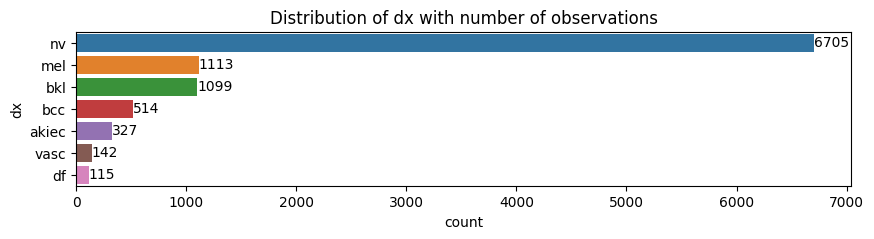

In [165]:
plt.figure(figsize=(10, 2))
ax = sns.countplot(y="dx", data=dataframe, order=dataframe['dx'].value_counts().index)
plt.title("Distribution of dx with number of observations")

if hasattr(ax, 'patches'):  # Ensure ax has the 'patches' attribute
    for p in ax.patches:
        ax.text(p.get_width(), p.get_y() + p.get_height()/2, 
                f'{int(p.get_width())}', 
                va='center')

plt.show()

#### dx_type

Unique Values, Missing Values

In [166]:
# Analyze feature "dx_type"
print("Number of unique values in feature 'dx_type':", dataframe["dx_type"].nunique())
print("Number of missing values in feature 'dx_type':", dataframe["dx_type"].isnull().sum())

Number of unique values in feature 'dx_type': 4
Number of missing values in feature 'dx_type': 0


Countplot kinds of diagnosis.

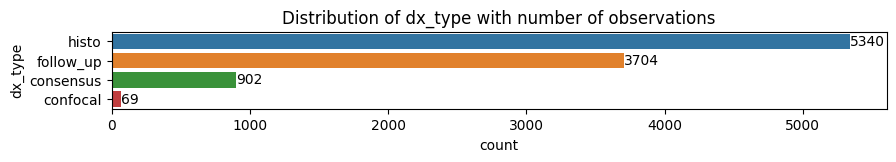

In [167]:
plt.figure(figsize=(10, 1))
ax = sns.countplot(y="dx_type", data=dataframe, order=dataframe['dx_type'].value_counts().index)
plt.title("Distribution of dx_type with number of observations")

if hasattr(ax, 'patches'):  # Ensure ax has the 'patches' attribute
    for p in ax.patches:
        ax.text(p.get_width(), p.get_y() + p.get_height()/2, 
                f'{int(p.get_width())}', 
                va='center')

plt.show()

#### age

Unique Values, Missing Values

In [168]:
# Analyze the feature "age"
print("Number of unique values in feature 'age':", dataframe["age"].nunique())
print("Number of missing values in feature 'age':", dataframe["age"].isnull().sum())

Number of unique values in feature 'age': 18
Number of missing values in feature 'age': 57


Text(0.5, 1.0, 'Distribution of dx with missing age')

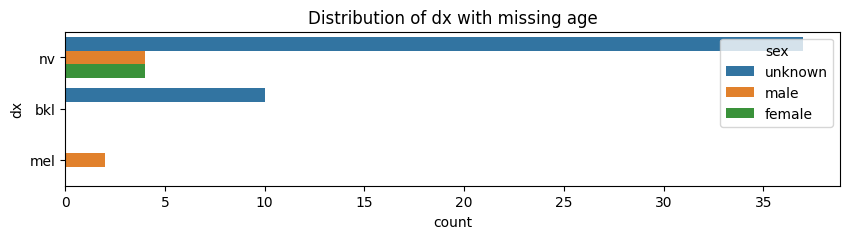

In [169]:
missing_ages = dataframe[dataframe["age"].isnull()]

# plot missing ages regarding dx and sex
plt.figure(figsize=(10, 2))
ax = sns.countplot(y="dx", data=missing_ages, hue='sex', order=missing_ages['dx'].value_counts().index)
plt.title("Distribution of dx with missing age")

Mean, standard deviation, range

In [170]:
# Describe the feature "age"
dataframe[["age"]].describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


Histogram of age

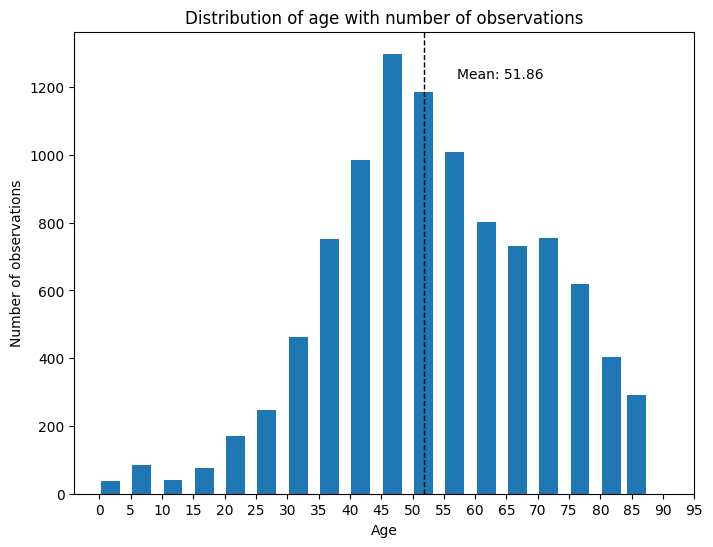

In [171]:
#plot histogram of age
plt.figure(figsize=(8, 6))
plt.hist(dataframe["age"], bins=85, width=3, rwidth=0.5)
plt.title("Distribution of age with number of observations")
plt.xlabel("Age")
plt.ylabel("Number of observations")
plt.xticks(np.arange(0, 100, step=5))
#plot mean with line and label and show value
plt.axvline(dataframe["age"].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(dataframe["age"].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(dataframe["age"].mean()))
plt.show()


Boxplot of age

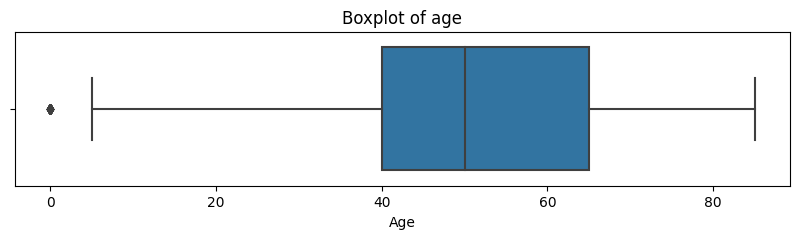

In [172]:
# plot boxplot of age
plt.figure(figsize=(10, 2))
sns.boxplot(x=dataframe["age"])
plt.title("Boxplot of age")
plt.xlabel("Age")
plt.show()


#### sex

Unique Values, Missing Values

In [173]:
#analyze the feature sex
print("Number of unique values in feature 'sex':", dataframe["sex"].nunique())
print("Number of missing values in feature 'sex':", dataframe["sex"].isnull().sum())

Number of unique values in feature 'sex': 3
Number of missing values in feature 'sex': 0


Number of unknown sex: 57


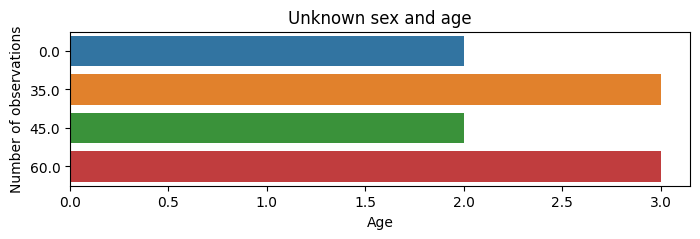

In [174]:
#count 'unknown' values in sex and print
unknown_sex = dataframe.query("sex == 'unknown'")
print("Number of unknown sex:" , unknown_sex.shape[0])

#plot unknown_sex regarding age
plt.figure(figsize=(8, 2))
sns.countplot(data=unknown_sex, y="age")
plt.title("Unknown sex and age")
plt.xlabel("Age")
plt.ylabel("Number of observations")
plt.show()



Countplot of sex

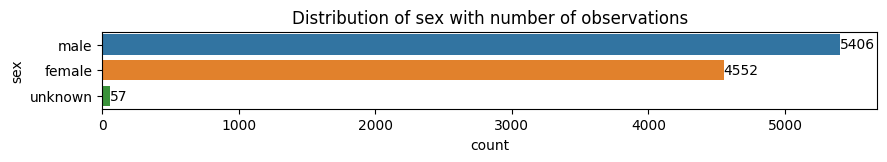

In [175]:
plt.figure(figsize=(10, 1))
ax = sns.countplot(y="sex", data=dataframe, order=dataframe['sex'].value_counts().index)
plt.title("Distribution of sex with number of observations")

if hasattr(ax, 'patches'):  # Ensure ax has the 'patches' attribute
    for p in ax.patches:
        ax.text(p.get_width(), p.get_y() + p.get_height()/2, 
                f'{int(p.get_width())}', 
                va='center')

plt.show()

#### localization

Unique Values, Missing Values

In [176]:
# Analyze the feature "age"
print("Number of unique values in feature 'localization':", dataframe["localization"].nunique())
print("Number of missing values in feature 'localization':", dataframe["localization"].isnull().sum())

Number of unique values in feature 'localization': 15
Number of missing values in feature 'localization': 0


Countplot of localization

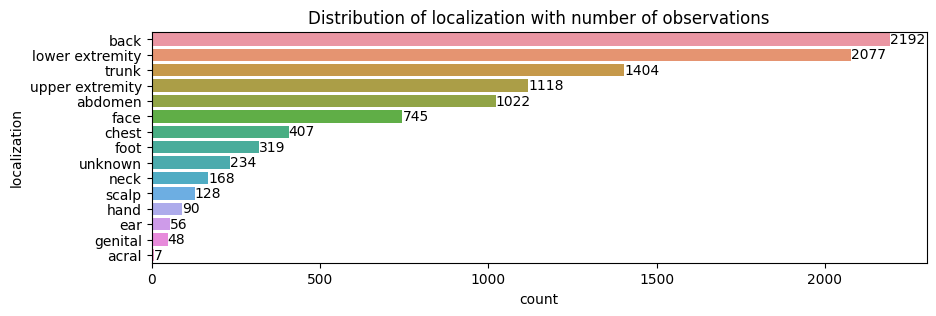

In [177]:
plt.figure(figsize=(10, 3))
ax = sns.countplot(y="localization", data=dataframe, order=dataframe['localization'].value_counts().index)
plt.title("Distribution of localization with number of observations")

if hasattr(ax, 'patches'):  # Ensure ax has the 'patches' attribute
    for p in ax.patches:
        ax.text(p.get_width(), p.get_y() + p.get_height()/2, 
                f'{int(p.get_width())}', 
                va='center')

plt.show()

#### dataset

Unique Values, Missing Values

In [178]:
# Analyze the feature "dataset"
print("Number of unique values in feature 'dataset':", dataframe["dataset"].nunique())
print("Number of missing values in feature 'dataset':", dataframe["dataset"].isnull().sum())

Number of unique values in feature 'dataset': 4
Number of missing values in feature 'dataset': 0


Countplot of dataset

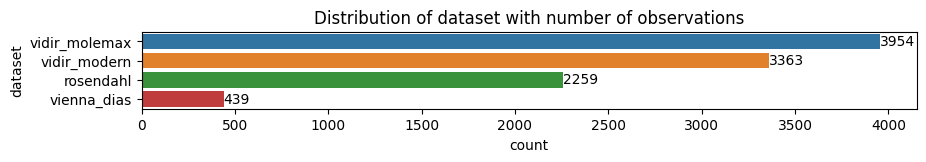

In [179]:
plt.figure(figsize=(10, 1))
ax = sns.countplot(y="dataset", data=dataframe, order=dataframe['dataset'].value_counts().index)
plt.title("Distribution of dataset with number of observations")

if hasattr(ax, 'patches'):  # Ensure ax has the 'patches' attribute
    for p in ax.patches:
        ax.text(p.get_width(), p.get_y() + p.get_height()/2, 
                f'{int(p.get_width())}', 
                va='center')

plt.show()

### 3.2 Confronting Emerging Issues - Round 1

#### Problem 2: Missing Values in Age column - We can either drop the rows with missing values or impute the missing values with mean/median/mode.

In [180]:
# show range of age
dataframe.age.describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

#### Solution Problem 2:

In [181]:
# replace NaN with the mean of the age column
#df_filled = dataframe['age'].fillna((dataframe['age'].mean()), inplace=True)

solve later

### 3.3 Relational Statistics

In [182]:
# define features as categorical
dataframe['dx'] = dataframe['dx'].astype('category')
dataframe['dx_type'] = dataframe['dx_type'].astype('category')
dataframe['sex'] = dataframe['sex'].astype('category')
dataframe['localization'] = dataframe['localization'].astype('category')
dataframe['dataset'] = dataframe['dataset'].astype('category')

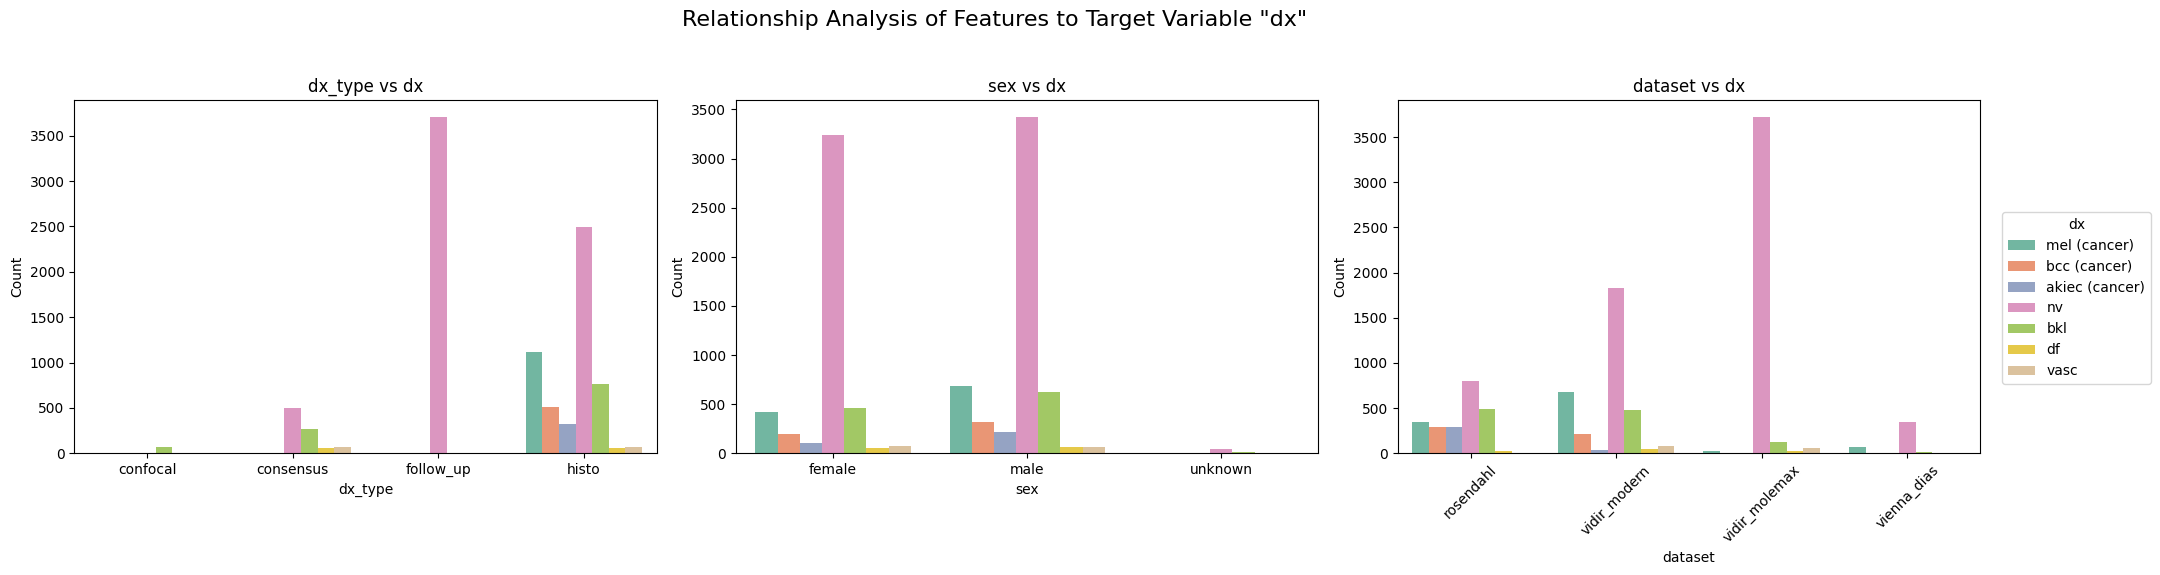

In [183]:
data = dataframe
order_categories = ['mel', 'bcc', 'akiec', 'nv', 'bkl', 'df', 'vasc']

# Set up the figure and axes for the three plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Relationship Analysis of Features to Target Variable "dx"', fontsize=16)

# Plot dx_type vs dx
sns.countplot(data=data, x='dx_type', hue='dx', ax=axes[0], palette="Set2", hue_order=order_categories)
axes[0].set_title('dx_type vs dx')
axes[0].set_ylabel('Count')
axes[0].get_legend().remove()  # Remove individual legend

# Plot sex vs dx
sns.countplot(data=data, x='sex', hue='dx', ax=axes[1], palette="Set2", hue_order=order_categories)
axes[1].set_title('sex vs dx')
axes[1].set_ylabel('Count')
axes[1].get_legend().remove()  # Remove individual legend

# Plot dataset vs dx
sns.countplot(data=data, x='dataset', hue='dx', ax=axes[2], palette="Set2", hue_order=order_categories)
axes[2].set_title('dataset vs dx')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
axes[2].get_legend().remove()  # Remove individual legend

# Add a common legend outside the grid
handles, labels = axes[2].get_legend_handles_labels()
labels = ['mel (cancer)', 'bcc (cancer)', 'akiec (cancer)', 'nv', 'bkl', 'df', 'vasc']
fig.legend(handles=handles, labels=labels, title='dx', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



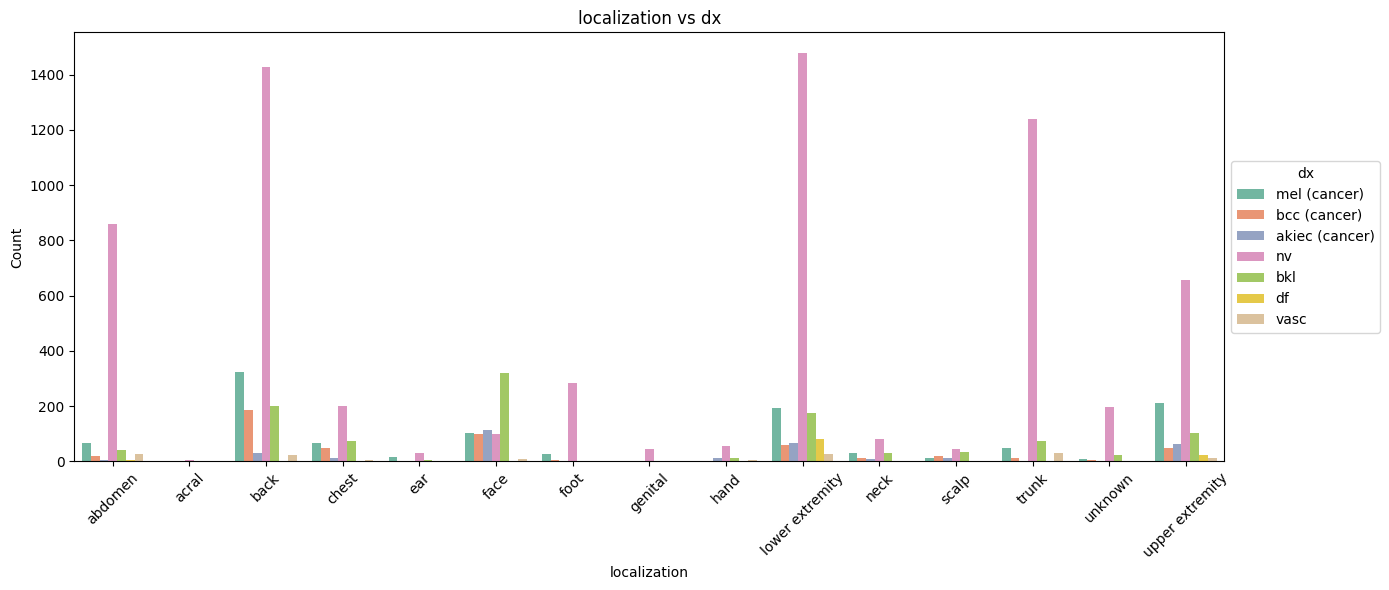

In [199]:
data = dataframe
order_categories = ['mel', 'bcc', 'akiec', 'nv', 'bkl', 'df', 'vasc']

# Plot for localization vs dx with the legend outside the grid
plt.figure(figsize=(14, 6))
ax_local = sns.countplot(data=data, x='localization', hue='dx', palette="Set2", hue_order=order_categories)
plt.title('localization vs dx')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add a legend outside the grid
handles, labels = ax_local.get_legend_handles_labels()
labels = ['mel (cancer)', 'bcc (cancer)', 'akiec (cancer)', 'nv', 'bkl', 'df', 'vasc']
plt.legend(handles=handles, labels=labels, title='dx', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

#### Contingency: dx vs dx_type

The cross table displays the relationship between "dx" and "dx_type". For some categories of "dx", there is only one type of "dx_type" (e.g., "akiec" and "histo").

In [184]:
# Create a contingency table for dx and dx_type
contingency_dx_type = pd.crosstab(dataframe['dx'], dataframe['dx_type'])

contingency_dx_type



dx_type,confocal,consensus,follow_up,histo
dx,,,,
akiec,0,0,0,327
bcc,0,0,0,514
bkl,69,264,0,766
df,0,60,0,55
mel,0,0,0,1113
nv,0,503,3704,2498
vasc,0,75,0,67


#### Contingency dx vs sex

The cross table shows the distribution of skin lesion types ("dx") in relation to gender. For example, there are 106 cases of "akiec" in women and 221 cases in men.

In [185]:
# Create a contingency table for dx and sex
contingency_sex = pd.crosstab(data['dx'], data['sex'])

contingency_sex

sex,female,male,unknown
dx,,,
akiec,106,221,0
bcc,197,317,0
bkl,463,626,10
df,52,63,0
mel,424,689,0
nv,3237,3421,47
vasc,73,69,0


#### Contingency dx vs localization

The cross table shows the distribution of skin lesion types ("dx") in relation to their localization. For example, there are 65 cases of "akiec" located on the lower extremities and 113 cases of "akiec" located on the face.

In [186]:
# Create a contingency table for dx and localization
contingency_localization = pd.crosstab(data['dx'], data['localization'])

contingency_localization

localization,abdomen,acral,back,chest,ear,face,foot,genital,hand,lower extremity,neck,scalp,trunk,unknown,upper extremity
dx,,,,,,,,,,,,,,,
akiec,5,0,29,12,3,113,0,0,13,65,10,14,1,0,62
bcc,18,0,186,47,0,101,4,0,2,58,14,19,11,5,49
bkl,42,0,202,74,6,319,1,2,14,174,31,34,73,23,104
df,4,0,2,0,0,0,2,1,0,82,0,0,0,0,24
mel,66,0,324,68,17,104,28,0,1,192,29,14,47,10,213
nv,860,7,1427,200,30,100,284,45,55,1479,81,45,1241,196,655
vasc,27,0,22,6,0,8,0,0,5,27,3,2,31,0,11


#### Contingency dx vs dataset

The cross table shows the distribution of skin lesion types ("dx") based on the dataset from which they originate. For example, there are 295 cases of "akiec" from the "rosendahl" dataset and 32 cases from the "vidir_modern" dataset.

In [187]:
# Create a contingency table for dx and dataset
contingency_dataset = pd.crosstab(data['dx'], data['dataset'])

contingency_dataset

dataset,rosendahl,vidir_modern,vidir_molemax,vienna_dias
dx,,,,
akiec,295,32,0,0
bcc,296,211,2,5
bkl,490,475,124,10
df,30,51,30,4
mel,342,680,24,67
nv,803,1832,3720,350
vasc,3,82,54,3


#### Mean Age per Diagnosis

The bar chart shows the average age for each category of "dx". For instance, individuals with the diagnosis "df" (Dermatofibroma) have an average age that is higher than those with the diagnosis "mel" (Melanoma).

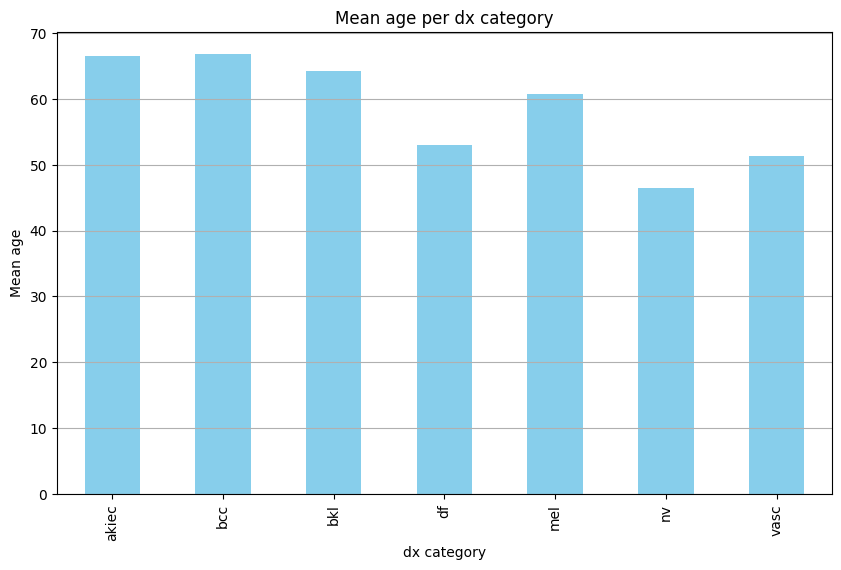

In [188]:
# Group by dx and calculate mean age
mean_age_per_dx = data.groupby('dx')['age'].mean()

# Plot the mean age for each dx category
plt.figure(figsize=(10, 6))
mean_age_per_dx.plot(kind='bar', color='skyblue')
plt.title('Mean age per dx category')
plt.ylabel('Mean age')
plt.xlabel('dx category')
plt.grid(axis='y')
plt.show()

#### Chi2-Test

Categorical data can be correlated with the target variable using the Chi-Squared Test. This test checks if there is a significant association between two categorical variables. A significant test value suggests that the variables are not independent of each other.

In the case where the target variable ("dx") and a categorical feature are correlated, we can use the p-value of the Chi-Squared Test to determine if the association is significant.

In [207]:
from scipy.stats import chi2_contingency

# List of categorical features to test
features_to_test = ['dx_type', 'sex', 'localization', 'dataset']

# Store p-values and test statistics
p_values = {}
test_statistics = {}

# Perform chi2 test for each feature
for feature in features_to_test:
    contingency_table = pd.crosstab(data['dx'], data[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values[feature] = p
    test_statistics[feature] = chi2

print("p-Values: ", p_values)
print("Test Statistics:", test_statistics)
print("Significance level: 0.05")
print("")
print("Conclusion:")
print("The null hypothesis is rejected if the p-value is less than the significance level.")
print("The null hypothesis is that the two categorical variables (feature vs dx) are independent.")
print("The alternative hypothesis is that the two categorical variables (feature vs dx) are dependent.")
print("")
print("The p-values are all less than the significance level.")
print("Therefore, the null hypothesis is rejected for all features.")
print("The alternative hypothesis is accepted for all features.")


p-Values:  {'dx_type': 0.0, 'sex': 2.4464388098587195e-17, 'localization': 0.0, 'dataset': 0.0}
Test Statistics: {'dx_type': 4576.809761851322, 'sex': 106.90381271641068, 'localization': 2821.9101978213816, 'dataset': 3484.0619808375}
Significance level: 0.05

Conclusion:
The null hypothesis is rejected if the p-value is less than the significance level.
The null hypothesis is that the two categorical variables (feature vs dx) are independent.
The alternative hypothesis is that the two categorical variables (feature vs dx) are dependent.

The p-values are all less than the significance level.
Therefore, the null hypothesis is rejected for all features.
The alternative hypothesis is accepted for all features.


The bar chart displays the Chi2 test statistics for the various features in relation to the target variable "dx". A higher value of the test statistic suggests a stronger association between the feature and the target variable. As you can see, all features have a significant association with "dx", with "dx_type" showing the strongest and "sex" showing the weakest (but still significant) association.

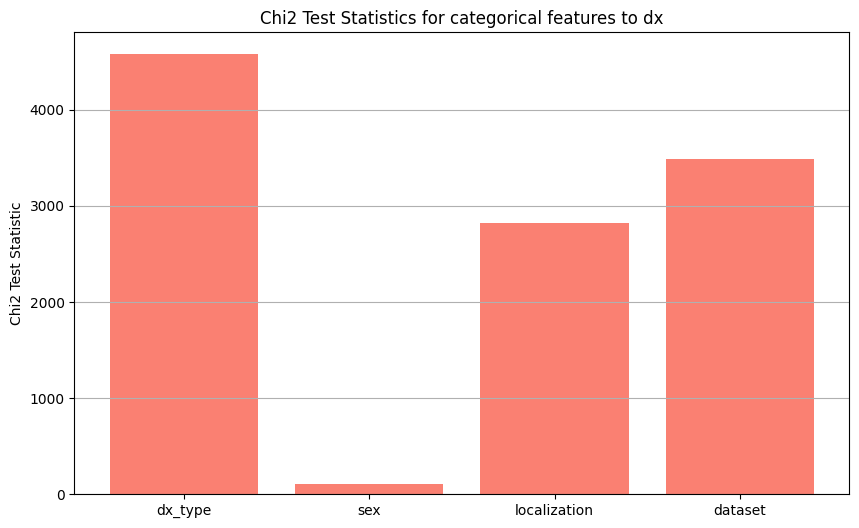

In [190]:
# Visualize the chi2 test statistics for each feature
plt.figure(figsize=(10, 6))
plt.bar(test_statistics.keys(), test_statistics.values(), color='salmon')
plt.ylabel('Chi2 Test Statistic')
plt.title('Chi2 Test Statistics for categorical features to dx')
plt.grid(axis='y')
plt.show()

#### dx and age

Boxplot age and dx

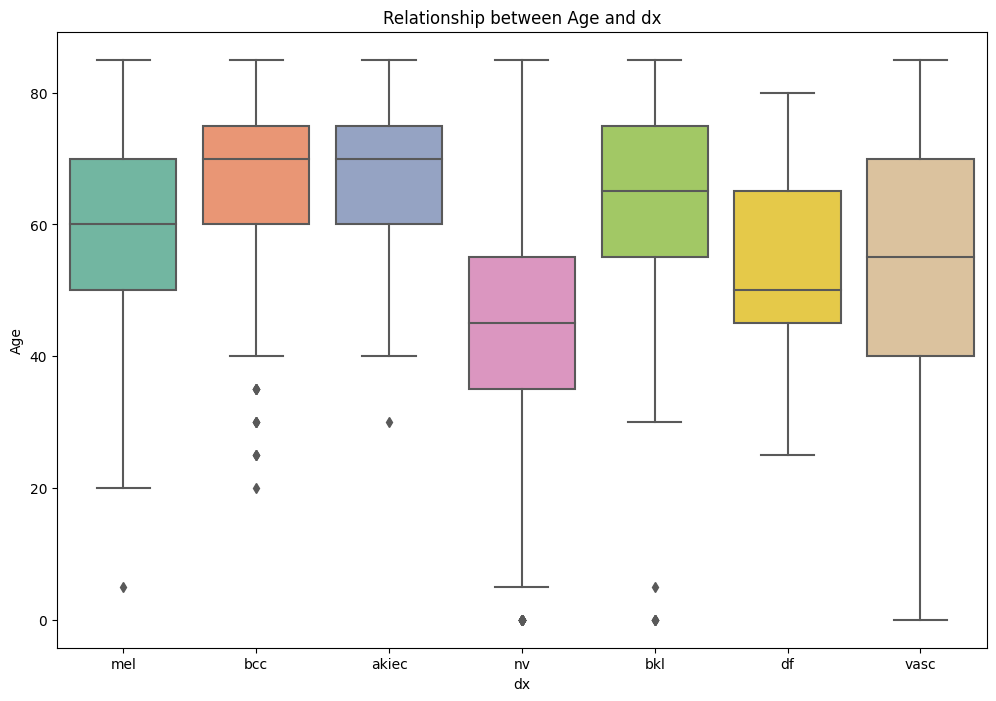

In [191]:
data = dataframe

# Boxplot to visualize the relationship between 'age' and 'dx'
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='dx', y='age', palette="Set2", order=order_categories)
plt.title('Relationship between Age and dx')
plt.ylabel('Age')
plt.xlabel('dx')
plt.show()

Based on the boxplot visualizing the relationship between 'age' and 'dx' (excluding 'nv'), we can make the following observations:

1) Spread and Central Tendency:

    The median age for conditions like 'akiec' seems to be higher compared to other conditions, suggesting that 'akiec' might be more prevalent among older individuals.
    'mel' and 'bcc' also show a higher median age compared to some other conditions, but not as high as 'akiec'.

2) Variability:

    The age distribution for 'nv' (which was excluded in the later analysis) was broader, meaning it affects a wider age range of people.
    The interquartile range (IQR, represented by the box's height) for conditions like 'akiec' is narrower, suggesting that the ages of patients with this condition are more concentrated around the median.

3) Outliers:

    There may be some outliers (points outside the whiskers of the boxplot) for some conditions, indicating ages that are unusually high or low for those conditions.

4) Comparisons:

    By comparing the boxes' positions and spreads, we can infer which conditions are more prevalent at younger or older ages. For instance, 'akiec' and 'mel' tend to be associated with older ages compared to conditions like 'bkl' or 'df'.

In summary, the boxplot provides insights into the age distributions associated with each 'dx' category. It suggests that certain skin conditions may be more prevalent or diagnosed at specific age ranges. The exact age distributions and their implications would need to be further investigated and validated with domain-specific knowledge and larger datasets.

**A more detailed look at age, localization and cancer-related diagnoses:**

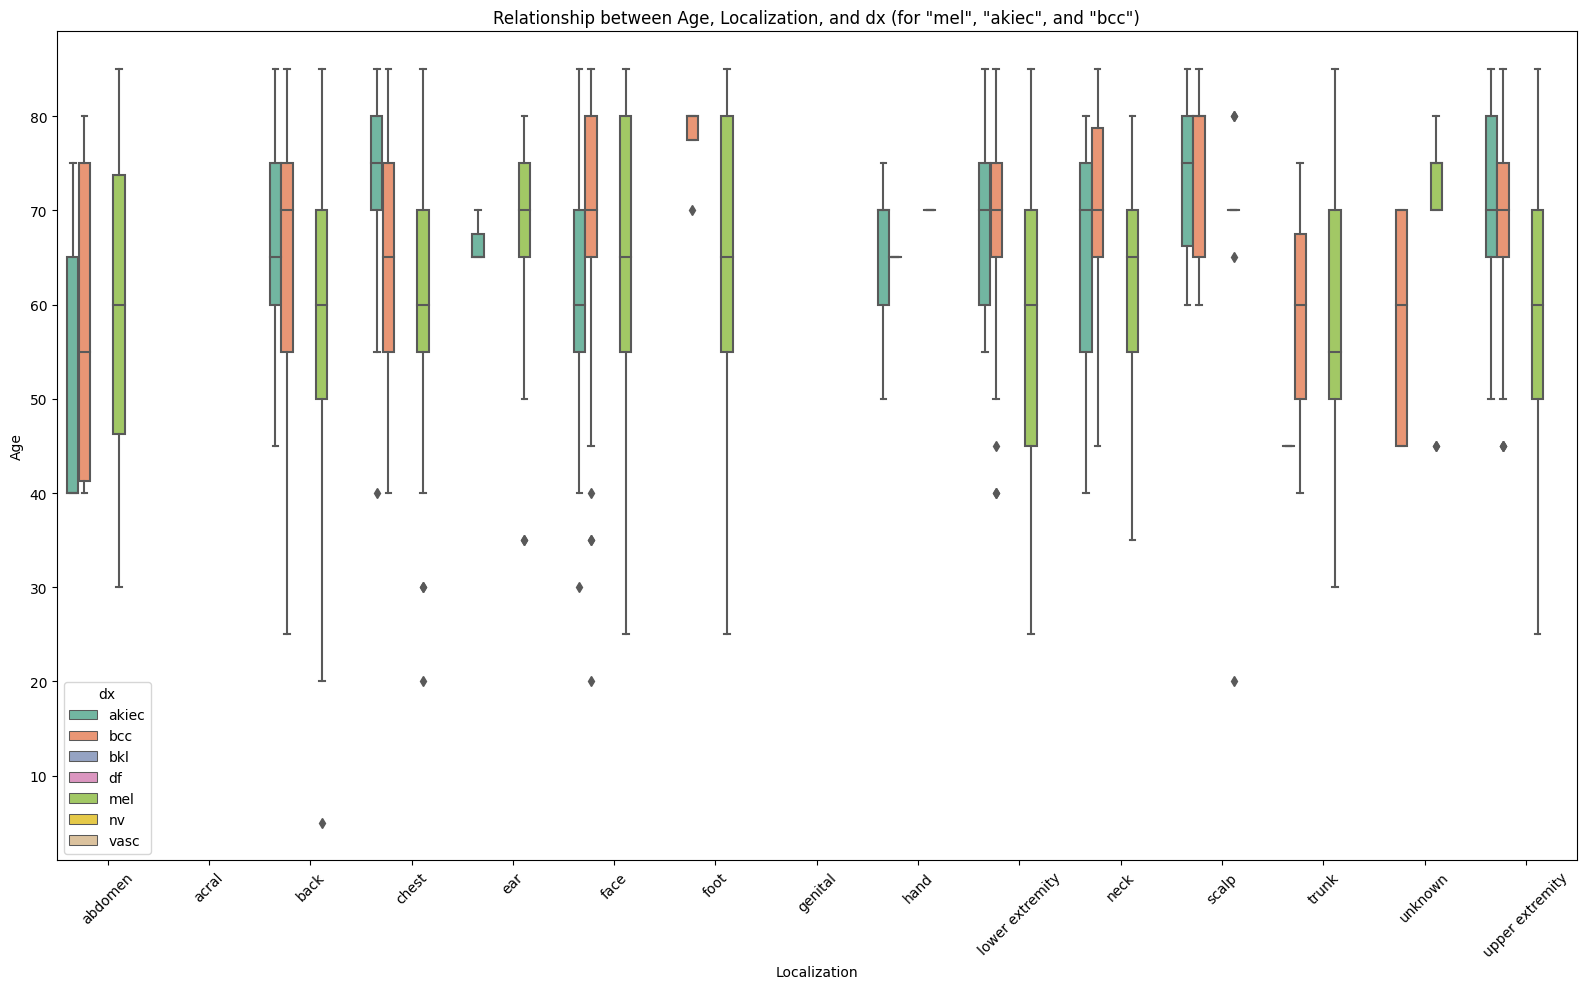

In [192]:
data = dataframe

# Filter the dataset for rows where 'dx' is 'mel', 'akiec', or 'bcc'
filtered_data = data[data['dx'].isin(['mel', 'akiec', 'bcc'])]

# Boxplot to visualize the relationship between 'age', 'localization', and 'dx'
plt.figure(figsize=(16, 10))
sns.boxplot(data=filtered_data, x='localization', y='age', hue='dx', palette="Set2")
plt.title('Relationship between Age, Localization, and dx (for "mel", "akiec", and "bcc")')
plt.ylabel('Age')
plt.xlabel('Localization')
plt.legend(title='dx')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3.4 Risk Ratio

#### Localization and Melanoma (skin cancer 3)

The bar chart below shows the risk ratio for "mel" in relation to the various "localization" categories, with "abdomen" serving as the reference group.
A risk ratio greater than 1 means that the risk of having an actinic carcinoma in this specific "localization" category is higher than in the "abdomen".

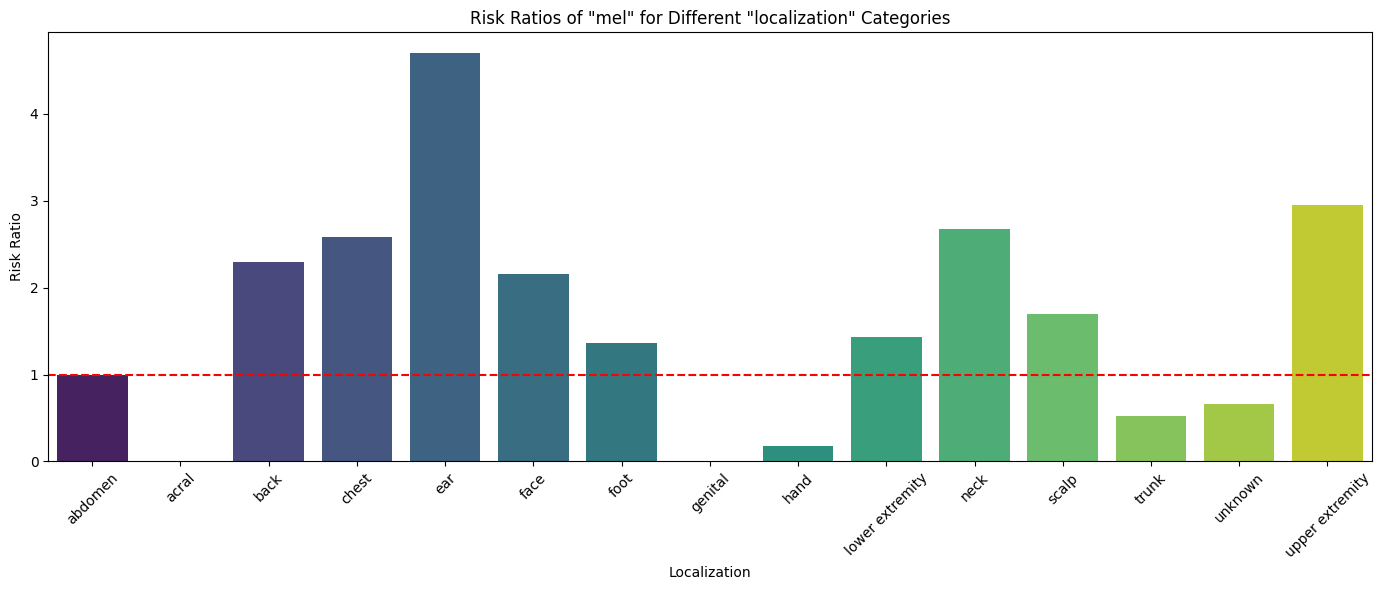

In [194]:
data = dataframe

# Create a binary column for the event "mel"
data['mel_event'] = (data['dx'] == 'mel').astype(int)

# Calculate the risk for each localization category
risk_per_localization = data.groupby('localization')['mel_event'].mean()

# Choose "abdomen" as the reference group
reference_risk = risk_per_localization['abdomen']

# Calculate the risk ratio for each localization category
risk_ratios = risk_per_localization / reference_risk

# Visualize the risk ratios
plt.figure(figsize=(14, 6))
sns.barplot(x=risk_ratios.index, y=risk_ratios.values, palette="viridis")
plt.title('Risk Ratios of "mel" for Different "localization" Categories')
plt.ylabel('Risk Ratio')
plt.xlabel('Localization')
plt.axhline(y=1, color='red', linestyle='--')  # Reference line for RR=1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Localization and basal cell carcinoma (skin cancer 2)

The bar chart below shows the risk ratio for "bcc" in relation to the various "localization" categories, with "abdomen" serving as the reference group.
As in the previous charts, a risk ratio greater than 1 means that the risk of having an actinic carcinoma in this specific "localization" category is higher than in the "abdomen".

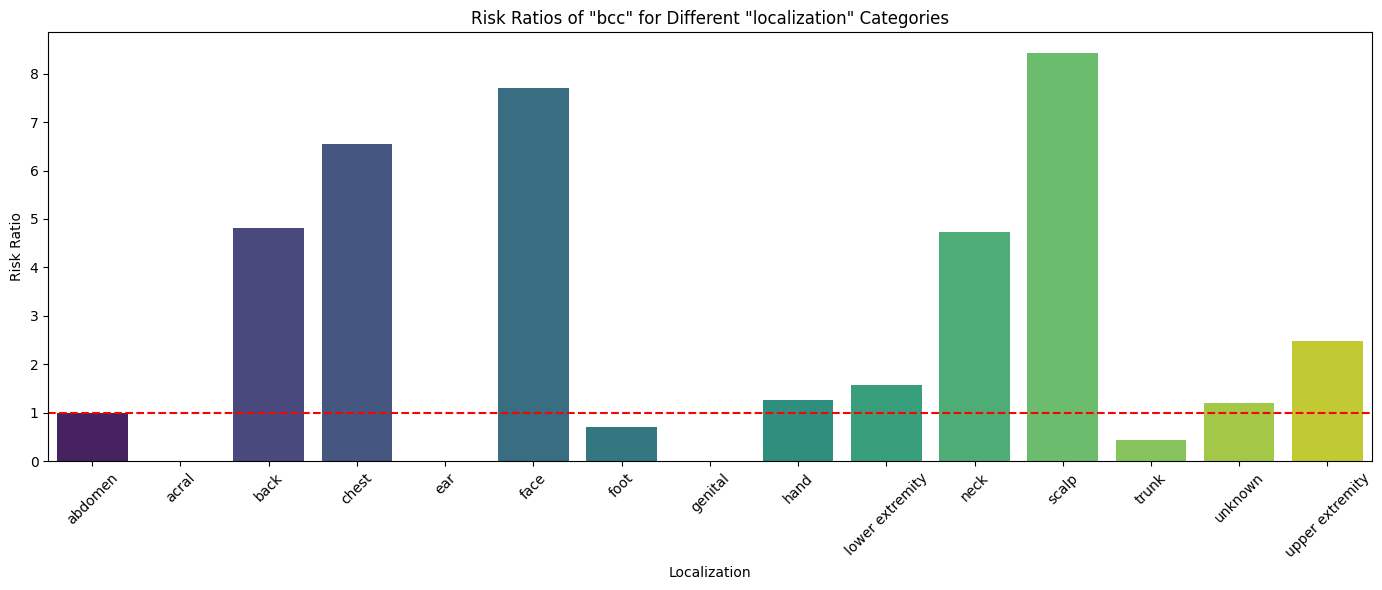

In [195]:
data = dataframe

# Create a binary column for the event "bcc"
data['bcc_event'] = (data['dx'] == 'bcc').astype(int)

# Calculate the risk for each localization category
risk_per_localization_bcc = data.groupby('localization')['bcc_event'].mean()

# Use "abdomen" as the reference group
reference_risk_bcc = risk_per_localization_bcc['abdomen']

# Calculate the risk ratio for each localization category
risk_ratios_bcc = risk_per_localization_bcc / reference_risk_bcc

# Visualize the risk ratios for bcc
plt.figure(figsize=(14, 6))
sns.barplot(x=risk_ratios_bcc.index, y=risk_ratios_bcc.values, palette="viridis")
plt.title('Risk Ratios of "bcc" for Different "localization" Categories')
plt.ylabel('Risk Ratio')
plt.xlabel('Localization')
plt.axhline(y=1, color='red', linestyle='--')  # Reference line for RR=1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Localization and actinic keratoses and intraepithelial carcinoma / Bowen's disease (skin cancer 3)

The bar chart below shows the risk ratio for "akiec" in relation to the various "localization" categories, with "abdomen" serving as the reference group.
As in the previous charts, a risk ratio greater than 1 means that the risk of having an actinic carcinoma in this specific "localization" category is higher than in the "abdomen".

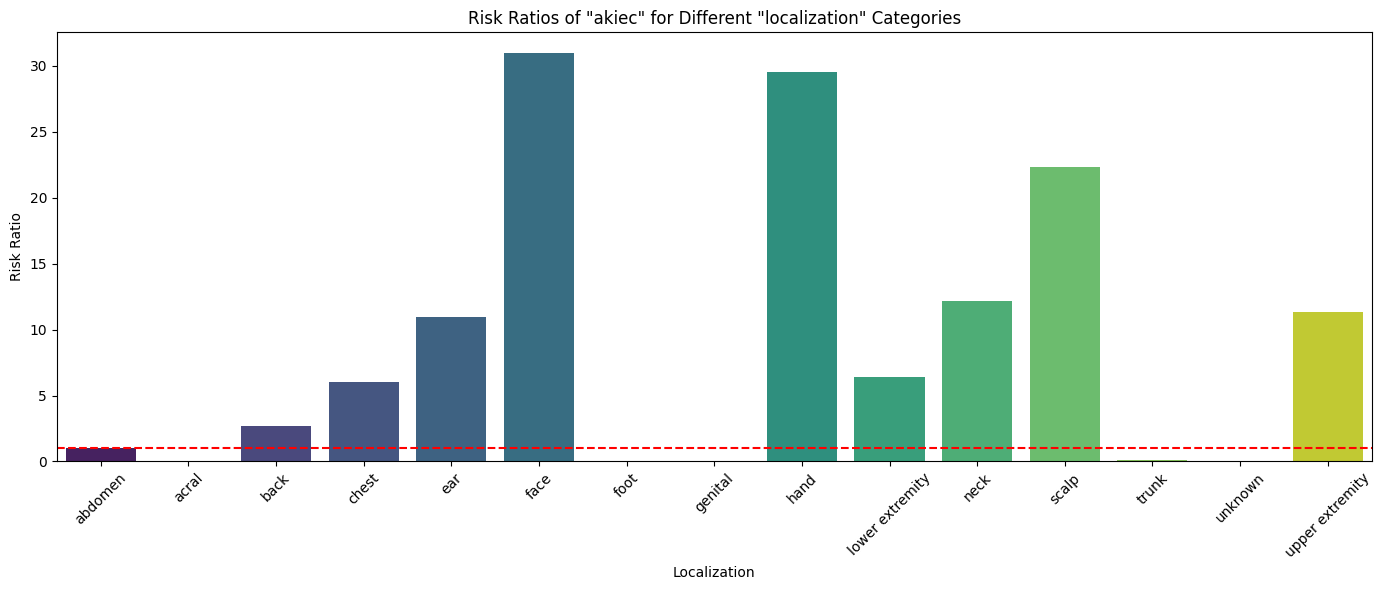

In [196]:
data = dataframe

# Create a binary column for the event "akiec"
data['akiec_event'] = (data['dx'] == 'akiec').astype(int)

# Calculate the risk for each localization category
risk_per_localization_akiec = data.groupby('localization')['akiec_event'].mean()

# Use "abdomen" as the reference group
reference_risk_akiec = risk_per_localization_akiec['abdomen']

# Calculate the risk ratio for each localization category
risk_ratios_akiec = risk_per_localization_akiec / reference_risk_akiec

# Visualize the risk ratios for akiec
plt.figure(figsize=(14, 6))
sns.barplot(x=risk_ratios_akiec.index, y=risk_ratios_akiec.values, palette="viridis")
plt.title('Risk Ratios of "akiec" for Different "localization" Categories')
plt.ylabel('Risk Ratio')
plt.xlabel('Localization')
plt.axhline(y=1, color='red', linestyle='--')  # Reference line for RR=1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4 Confronting Emerging Issues - Round 2

#### 1) Distribution of diagnosis

Target classifier is very imbalanced. We need to see if Tensorflow has problems with that. 
* Class weights - penalize the model for misclassifying minority class
* Data Augmentation - create more samples for minority class by multiple random transformations
* Resampling - create more samples for minority class by duplicating existing samples (SMOTE,variational autoencoders)
* Evaluation Metrics - Accuracy is not a good metric for imbalanced datasets. We can use F1 score, precision, recall, AUC etc.

Solutions: Subset of equal amount of images, anomaly detection, image augmentation

#### 2) Distribution of location of the lesion

In [197]:
dataframe.localization.unique()

['scalp', 'ear', 'face', 'back', 'trunk', ..., 'genital', 'neck', 'hand', 'foot', 'acral']
Length: 15
Categories (15, object): ['abdomen', 'acral', 'back', 'chest', ..., 'scalp', 'trunk', 'unknown', 'upper extremity']

Classes like trunk include chest,back,abdomen,genital and might overlap with upper extremity. We might need to decide where to classify these lesions. Maybe we can agglumerate all these classes into one class called trunk.

Maybe we can agglumerate some classes together like face and ear etc.


Contingency/ relation between cancerous / non-cancerous vs the location found

In [202]:
# relation between localization and type of lesion
# dropping nv because of the high number of entries
# Filter out rows where dx is 'nv'
# Filter out rows where dx is 'nv'
data_without_nv = data[data['dx'] != 'nv']

# Create a contingency table for 'localization' and 'dx'
contingency_table = pd.crosstab(data_without_nv['localization'], data_without_nv['dx'])

contingency_table


dx,akiec,bcc,bkl,df,mel,vasc
localization,,,,,,
abdomen,5,18,42,4,66,27
back,29,186,202,2,324,22
chest,12,47,74,0,68,6
ear,3,0,6,0,17,0
face,113,101,319,0,104,8
foot,0,4,1,2,28,0
genital,0,0,2,1,0,0
hand,13,2,14,0,1,5
lower extremity,65,58,174,82,192,27


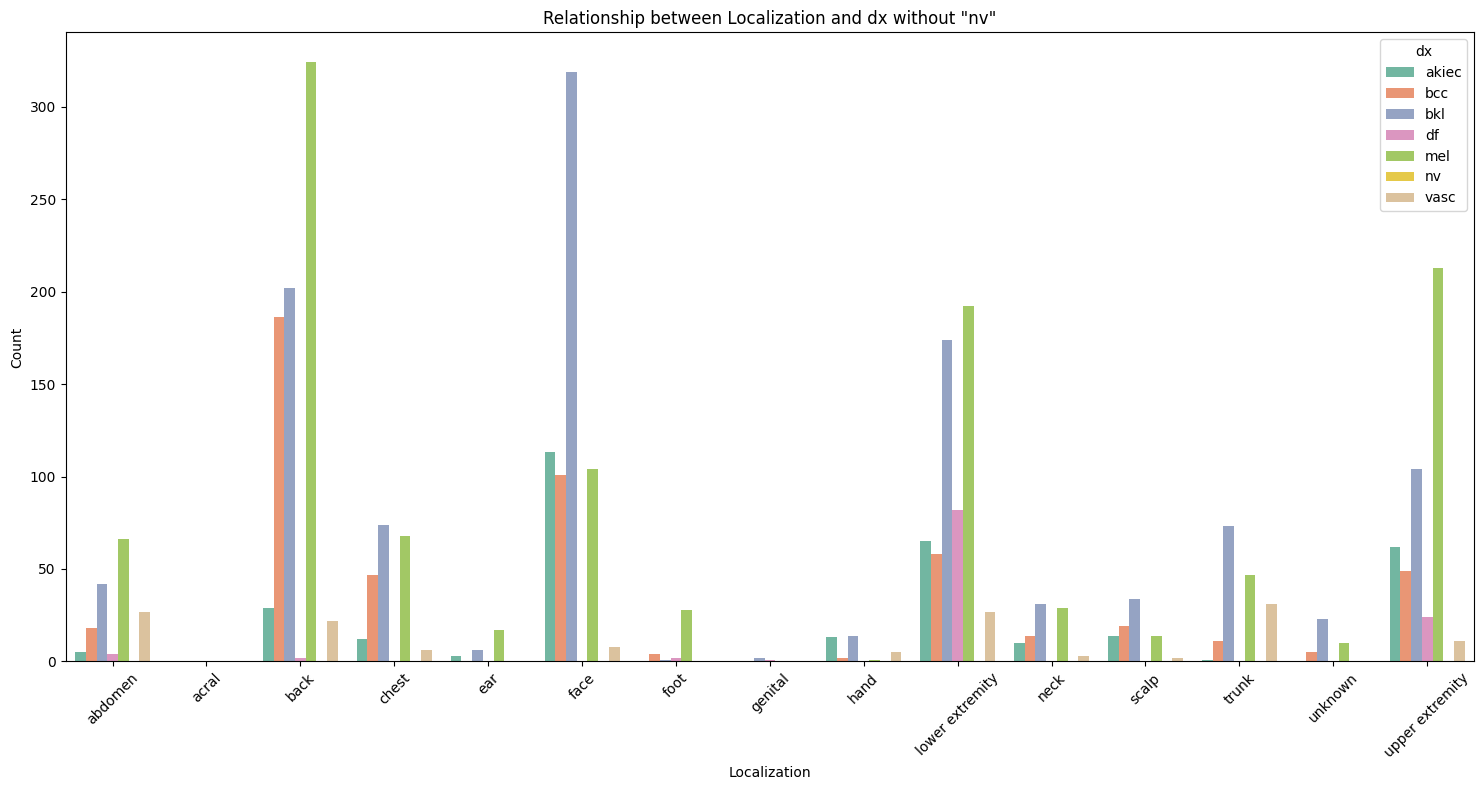

Chi-Squared Value: 3484.0619808375
P-Value: 0.0
The relationship between localization and dx (without nv) is statistically significant.


In [210]:
# Step 2: Visualization
plt.figure(figsize=(15, 8))
sns.countplot(data=data_without_nv, x='localization', hue='dx', palette="Set2")
plt.title('Relationship between Localization and dx without "nv"')
plt.ylabel('Count')
plt.xlabel('Localization')
plt.xticks(rotation=45)
plt.legend(title='dx')
plt.tight_layout()
plt.show()

# Step 3: Chi-Squared Test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p}")
if p < 0.05:
    print("The relationship between localization and dx (without nv) is statistically significant.")
else:
    print("There's no statistically significant relationship between localization and dx (without nv).")

#### 3) Distribution of Age and Sex

#### 4) Distribution of type of ground truth

distribution between cancerous/ non cancerous
do lesion_id/image_id come up again in dx_type follow up

can think about making two classes the doctor's praxis or the laboratory(confocal/histo)